-- Libraries

In [1]:
import os

import numpy as np
from sklearn.mixture import GaussianMixture
from joblib import dump, load
import random as rnd

import IPython
import librosa
import librosa.display

import matplotlib.pyplot as plt

-- Load dataset

In [2]:
file_dir = 'Data/'
rate = 16000
files_name_list = os.listdir('Data/')
print('{} files'.format(len(files_name_list)))
files_name_list

60 files


['off1.wav',
 'off10.wav',
 'off11.wav',
 'off12.wav',
 'off13.wav',
 'off14.wav',
 'off15.wav',
 'off16.wav',
 'off17.wav',
 'off18.wav',
 'off19.wav',
 'off2.wav',
 'off20.wav',
 'off21.wav',
 'off22.wav',
 'off23.wav',
 'off24.wav',
 'off25.wav',
 'off26.wav',
 'off27.wav',
 'off28.wav',
 'off29.wav',
 'off3.wav',
 'off30.wav',
 'off4.wav',
 'off5.wav',
 'off6.wav',
 'off7.wav',
 'off8.wav',
 'off9.wav',
 'on1.wav',
 'on10.wav',
 'on11.wav',
 'on12.wav',
 'on13.wav',
 'on14.wav',
 'on15.wav',
 'on16.wav',
 'on17.wav',
 'on18.wav',
 'on19.wav',
 'on2.wav',
 'on20.wav',
 'on21.wav',
 'on22.wav',
 'on23.wav',
 'on24.wav',
 'on25.wav',
 'on26.wav',
 'on27.wav',
 'on28.wav',
 'on29.wav',
 'on3.wav',
 'on30.wav',
 'on4.wav',
 'on5.wav',
 'on6.wav',
 'on7.wav',
 'on8.wav',
 'on9.wav']

-- Create Train and Test data

In [3]:
Train_len = 20
on_data_list = []
off_data_list = []
for name in files_name_list:
    if name[:2] == 'on':
        on_data_list.append(name)
    elif name[:3] == 'off':
        off_data_list.append(name)
    else:
        print('Error - DataName')
        
        
# shuffling
rnd.shuffle(on_data_list)
rnd.shuffle(off_data_list)

print('ON data Len: {}'.format(len(on_data_list)))
print('OFF data Len: {}'.format(len(off_data_list)))

train_data_list_on = on_data_list[:Train_len]
train_data_list_off = off_data_list[:Train_len]

test_data_list_on = on_data_list[Train_len:]
test_data_list_off = off_data_list[Train_len:]

print('train on  data Len: {}'.format(len(train_data_list_on)))
print('train off data Len: {}'.format(len(train_data_list_off)))
print('test on  data Len: {}'.format(len(test_data_list_on)))
print('test off data Len: {}'.format(len(test_data_list_off)))

ON data Len: 30
OFF data Len: 30
train on  data Len: 20
train off data Len: 20
test on  data Len: 10
test off data Len: 10


-- Representation of two examples of commands

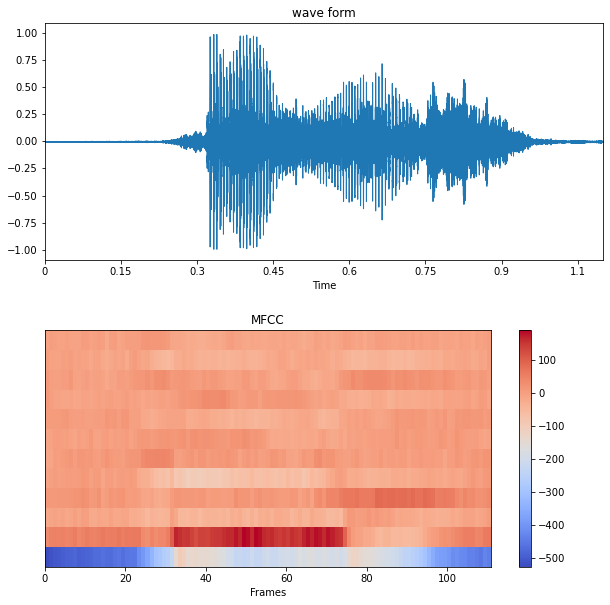

In [4]:
# Show a sig of dataset command:'Turn off'
data, sr = librosa.load((file_dir + files_name_list[0]), sr=rate, offset=0.3, duration=1.1)

fig, ax = plt.subplots(2, 1)
fig.subplots_adjust(hspace=0.3)
fig.set_size_inches(10, 10)

ax[0].set_title('wave form')
librosa.display.waveplot(y=data, sr=rate, ax=ax[0])

mfcc = librosa.feature.mfcc(data, sr=rate, n_mfcc=12, win_length=480, hop_length=160, window='hamming')
ax[1].set_title('MFCC')
img = librosa.display.specshow(mfcc, ax=ax[1], x_axis='frames')
fig.colorbar(img, ax=[ax[1]])
IPython.display.Audio(data, rate=rate)

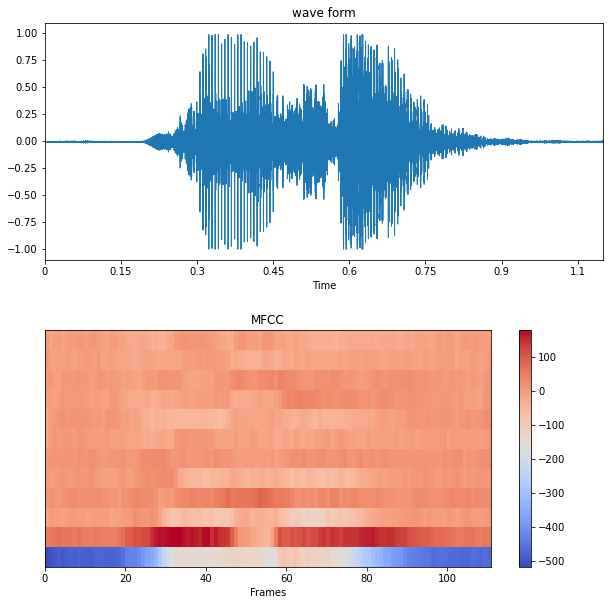

In [5]:
# Show a sig of dataset command:'Turn on'
data, sr = librosa.load((file_dir + files_name_list[-1]), sr=rate, offset=0.3, duration=1.1)

fig, ax = plt.subplots(2, 1)
fig.subplots_adjust(hspace=0.3)
fig.set_size_inches(10, 10)

ax[0].set_title('wave form')
librosa.display.waveplot(y=data, sr=rate, ax=ax[0])

mfcc = librosa.feature.mfcc(data, sr=rate, n_mfcc=12, win_length=480, hop_length=160, window='hamming')
ax[1].set_title('MFCC')
img = librosa.display.specshow(mfcc, ax=ax[1], x_axis='frames')
fig.colorbar(img, ax=[ax[1]])
IPython.display.Audio(data, rate=rate)

-- Extrac feature

In [6]:
# Extract feature
def extract_feature(file_dir, file_name_list, rate, n_mfcc, n_fft=2048, win_len=480, win_hop=160, win='hamming'):
    x_train_mfcc = np.array([0])
    for name in file_name_list:
        data, sr = librosa.load(file_dir + name, sr=rate, offset=0.3, duration=1)

        #MFCC
        mfcc = librosa.feature.mfcc(data, sr=rate,
                                    n_mfcc=n_mfcc, n_fft=n_fft,
                                    win_length=win_len, hop_length=win_hop, window=win, center=True).T

        if x_train_mfcc.shape == (1,):
            x_train_mfcc = mfcc
        else:
            x_train_mfcc = np.concatenate((x_train_mfcc, mfcc), axis = 0)
    return x_train_mfcc

In [7]:
x_train_on_features = extract_feature(file_dir, train_data_list_on, rate, 12)
x_train_off_features = extract_feature(file_dir, train_data_list_off, rate, 12)

x_test_on_features = extract_feature(file_dir, test_data_list_on, rate, 12)
x_test_off_features = extract_feature(file_dir, test_data_list_off, rate, 12)

x_train_on_features = np.asarray(x_train_on_features)
x_train_off_features = np.asarray(x_train_off_features)
x_test_on_features = np.asarray(x_test_on_features)
x_test_off_features = np.asarray(x_test_off_features)

print('x_train_on_features shape: {}'.format(x_train_on_features.shape))
print('x_train_off_features shape: {}'.format(x_train_off_features.shape))
print('x_test_on_features shape: {}'.format(x_test_on_features.shape))
print('x_test_off_features shape: {}'.format(x_test_off_features.shape))

x_train_on_features shape: (2020, 12)
x_train_off_features shape: (2020, 12)
x_test_on_features shape: (1010, 12)
x_test_off_features shape: (1010, 12)


-- Create an model

In [8]:
# Create mode for 'Turn on' command
GMM_on = GaussianMixture(n_components=8, tol=1e-10, max_iter=10000, covariance_type='full', init_params='kmeans')
fit_details = GMM_on.fit(x_train_on_features)
score = GMM_on.score(x_train_on_features)

# Save model on 'Model/GMM_on.joblib' dir
dump(GMM_on, 'Model/GMM_on.joblib')

print('Model (GMM_on) LogLikelihood score: {}'.format(score))
print('Max itter: {}'.format(GMM_on.n_iter_))

Model (GMM_on) LogLikelihood score: -45.77780074401695
Max itter: 186


In [9]:
# Create mode for 'Turn off' command
GMM_off = GaussianMixture(n_components=8, tol=1e-10, max_iter=10000, covariance_type='full', init_params='kmeans')
fit_details = GMM_off.fit(x_train_off_features)
score = GMM_off.score(x_train_off_features)

# Save model on 'Model/GMM_off.joblib' dir
dump(GMM_on, 'Model/GMM_off.joblib')

print('Model (GMM_off) LogLikelihood score: {}'.format(score))
print('Max itter: {}'.format(GMM_off.n_iter_))

Model (GMM_off) LogLikelihood score: -47.006104256492414
Max itter: 144


In [10]:
print('mean_ shape: {}'.format(GMM_on.means_.shape))
print('covariences_ shape: {}'.format(GMM_on.covariances_.shape))

mean_ shape: (8, 12)
covariences_ shape: (8, 12, 12)


In [11]:
print('mean_ shape: {}'.format(GMM_off.means_.shape))
print('covariences_ shape: {}'.format(GMM_off.covariances_.shape))

mean_ shape: (8, 12)
covariences_ shape: (8, 12, 12)


In [37]:
# Check command function
def check_command(data, model_dict, threshold):
    last_score = -1e6
    command_accepted = 'Unknown'
    for command in model_dict.keys():
        new_score = model_dict[command].score(data)
        if new_score > last_score:
            last_score = new_score
            command_accepted = command
            
    if last_score < threshold:
            command_accepted = 'Unknown'
    return (command_accepted, last_score)
    

In [39]:
print('\'off\' command score:')
print(check_command(x_test_off_features, {'off': GMM_off, 'on': GMM_on}, -60.0))
print()
print('\'on\' command score:')
print(check_command(x_test_on_features, {'off': GMM_off, 'on': GMM_on}, -60.0))

'off' command score:
('off', -48.088701711336334)

'on' command score:
('on', -47.316931970392105)


In [51]:
def command_predict(file_dir, file_name_list, model_dict, threshold, sig_rate=16000):
    predict_list = []
    for file_name in file_name_list:
        feature = extract_feature(file_dir, [file_name], sig_rate, 12)
        (command, score) = check_command(feature, model_dict, threshold)

        predict_list.append((command, score))
    return predict_list

In [52]:
# test with 'Turn on' command
print('(\'Command\', \'Best LogLikeLihood Score\') :')
command_predict(file_dir, test_data_list_on, {'off': GMM_off, 'on': GMM_on}, -60.0)

('Command', 'Best LogLikeLihood Score') :


[('on', -47.22356816977305),
 ('on', -47.53252473009027),
 ('on', -47.79274800666758),
 ('on', -48.20418767803677),
 ('on', -45.96607366235565),
 ('on', -46.1431842397392),
 ('on', -48.05596802205821),
 ('on', -46.87735926834782),
 ('on', -48.99514117185139),
 ('on', -46.378564755001115)]

In [53]:
# test with 'Turn off' command
print('(\'Command\', \'Best LogLikeLihood Score\') :')
command_predict(file_dir, test_data_list_off, {'off': GMM_off, 'on': GMM_on}, -60.0)

('Command', 'Best LogLikeLihood Score') :


[('off', -47.237552169242896),
 ('off', -49.33533730083259),
 ('off', -46.4330367140026),
 ('off', -47.95852166238059),
 ('off', -49.128770614144436),
 ('off', -47.093782393021236),
 ('off', -49.87266589281256),
 ('off', -48.02190132631774),
 ('off', -47.75712865884522),
 ('off', -48.04832038176355)]